In [ ]:
from google.colab import files 
  
uploaded = files.upload()

Saving UFC_Wins.csv to UFC_Wins.csv


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import math
import itertools
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pydotplus
import graphviz
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import mse, rmse
from scipy import stats
import scipy
import io
from sklearn.model_selection import cross_val_score
from scipy.stats.mstats import winsorize
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline

ufc_wins = pd.read_csv(io.BytesIO(uploaded['UFC_Wins.csv'])) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ufc_wins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fighter                     8241 non-null   object 
 1   Win_Lose                    8241 non-null   object 
 2   Referee                     8206 non-null   object 
 3   date                        8241 non-null   object 
 4   location                    8241 non-null   object 
 5   Winner                      8241 non-null   object 
 6   title_bout                  8241 non-null   bool   
 7   weight_class                8241 non-null   object 
 8   no_of_rounds                8241 non-null   int64  
 9   current_lose_streak         8241 non-null   int64  
 10  current_streak              8241 non-null   int64  
 11  draw                        8241 non-null   int64  
 12  avg_BODY_att                8241 non-null   float64
 13  avg_BODY_landed             8241 

The ufc_wins database contains a list of winners and losers from all UFC fights from 1993-2019. I would like to investigate what type of shots landed contributed the most to winning a fight and investigate the number of attempted (att) shots vs the number landed. This information will help coaches and fighter find an ideal mix for that type of shot. 

I predict that takedowns are the most relevant because wrestling is known to be the most dominant type of combat skill in Mixed Martial Arts and wrestlers excel the most at landing takedowns.

Each landed, att and pct variable is an average per round.

In [ ]:
ufc_wins['is_winner'] = pd.get_dummies(ufc_wins.Win_Lose, drop_first=True)

Create dummy variables for wins vs losses.

In [ ]:
landed = ufc_wins.drop(['Fighter', 'Win_Lose', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'no_of_rounds', 'current_lose_streak',
       'current_streak', 'draw', 'avg_BODY_att',
       'avg_CLINCH_att', 'avg_DISTANCE_att',
       'avg_GROUND_att',
       'avg_HEAD_att', 'avg_KD', 'avg_LEG_att',
       'avg_PASS', 'avg_REV', 'avg_SIG_STR__att',
       'avg_SIG_STR__pct', 'avg_SUB_ATT', 'avg_TD_att',
       'avg_TD_pct', 'avg_TOTAL_STR__att',
        'longest_streak', 'losses', 'avg_opp_BODY_att',
       'avg_opp_BODY_landed', 'avg_opp_CLINCH_att', 'avg_opp_CLINCH_landed',
       'avg_opp_DISTANCE_att', 'avg_opp_DISTANCE_landed', 'avg_opp_GROUND_att',
       'avg_opp_GROUND_landed', 'avg_opp_HEAD_att', 'avg_opp_HEAD_landed',
       'avg_opp_KD', 'avg_opp_LEG_att', 'avg_opp_LEG_landed', 'avg_opp_PASS',
       'avg_opp_REV', 'avg_opp_SIG_STR__att', 'avg_opp_SIG_STR__landed',
       'avg_opp_SIG_STR__pct', 'avg_opp_SUB_ATT', 'avg_opp_TD_att',
       'avg_opp_TD_landed', 'avg_opp_TD_pct', 'avg_opp_TOTAL_STR__att',
       'avg_opp_TOTAL_STR__landed', 'total_rounds_fought',
       'total_time_fought(seconds)', 'total_title_bouts',
       'by_Decision_Majority', 'by_Decision_Split', 'by_Decision_Unanimous',
       'by_KO/TKO', 'by_Submission', 'by_TKO_Doctor_Stoppage', 'wins',
       'Stance', 'Height_cms', 'Reach_cms', 'Weight_lbs', 'age'], axis=1)

Drop all variables other than shots landed to create dataframe to look at correlation to is_winner.

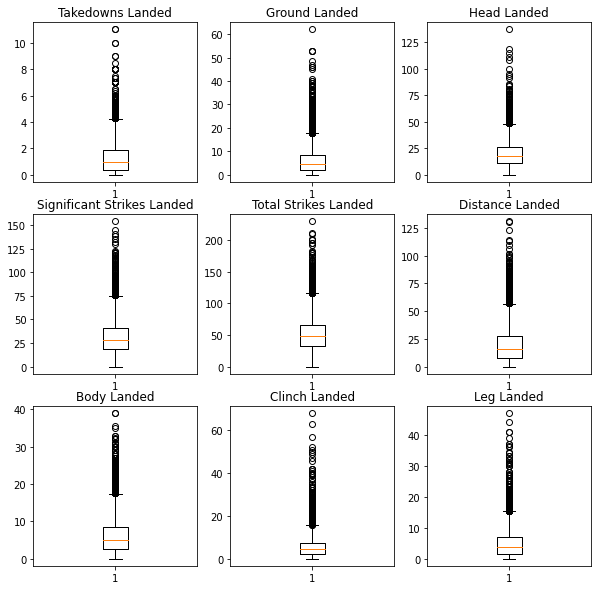

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
plt.boxplot(landed['avg_TD_landed'])
plt.title('Takedowns Landed')

plt.subplot(3,3,2)
plt.boxplot(landed['avg_GROUND_landed'])
plt.title('Ground Landed')

plt.subplot(3,3,3)
plt.boxplot(landed['avg_HEAD_landed'])
plt.title('Head Landed')

plt.subplot(3,3,4)
plt.boxplot(landed['avg_SIG_STR__landed'])
plt.title('Significant Strikes Landed')

plt.subplot(3,3,5)
plt.boxplot(landed['avg_TOTAL_STR__landed'])
plt.title('Total Strikes Landed')

plt.subplot(3,3,6)
plt.boxplot(landed['avg_DISTANCE_landed'])
plt.title('Distance Landed')

plt.subplot(3,3,7)
plt.boxplot(landed['avg_BODY_landed'])
plt.title('Body Landed')

plt.subplot(3,3,8)
plt.boxplot(landed['avg_CLINCH_landed'])
plt.title('Clinch Landed')

plt.subplot(3,3,9)
plt.boxplot(landed['avg_LEG_landed'])
plt.title('Leg Landed')

plt.show()

In [ ]:
landed['winsorize_avg_TD_landed'] = winsorize(landed['avg_TD_landed'], (0, 0.04))
landed['winsorize_avg_GROUND_landed'] = winsorize(landed['avg_GROUND_landed'], (0, 0.05))
landed['winsorize_avg_HEAD_landed'] = winsorize(landed['avg_HEAD_landed'], (0, 0.04))
landed['winsorize_avg_SIG_STR__landed'] = winsorize(landed['avg_SIG_STR__landed'], (0, 0.03))
landed['winsorize_avg_TOTAL_STR__landed'] = winsorize(landed['avg_TOTAL_STR__landed'], (0, 0.03))
landed['winsorize_avg_DISTANCE_landed'] = winsorize(landed['avg_DISTANCE_landed'], (0, 0.03))
landed['winsorize_avg_BODY_landed'] = winsorize(landed['avg_BODY_landed'], (0, 0.04))
landed['winsorize_avg_CLINCH_landed'] = winsorize(landed['avg_CLINCH_landed'], (0, 0.05))
landed['winsorize_avg_LEG_landed'] = winsorize(landed['avg_LEG_landed'], (0, 0.04))

Winsorize landed variables to remove outliers.

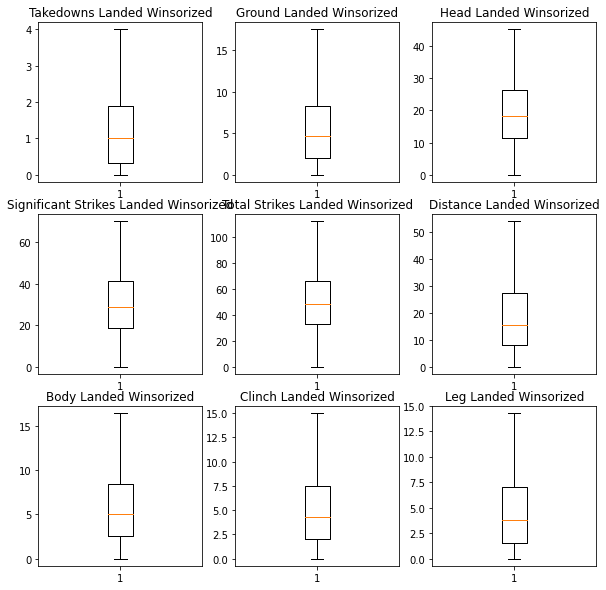

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
plt.boxplot(landed['winsorize_avg_TD_landed'])
plt.title('Takedowns Landed Winsorized')

plt.subplot(3,3,2)
plt.boxplot(landed['winsorize_avg_GROUND_landed'])
plt.title('Ground Landed Winsorized')

plt.subplot(3,3,3)
plt.boxplot(landed['winsorize_avg_HEAD_landed'])
plt.title('Head Landed Winsorized')

plt.subplot(3,3,4)
plt.boxplot(landed['winsorize_avg_SIG_STR__landed'])
plt.title('Significant Strikes Landed Winsorized')

plt.subplot(3,3,5)
plt.boxplot(landed['winsorize_avg_TOTAL_STR__landed'])
plt.title('Total Strikes Landed Winsorized')

plt.subplot(3,3,6)
plt.boxplot(landed['winsorize_avg_DISTANCE_landed'])
plt.title('Distance Landed Winsorized')

plt.subplot(3,3,7)
plt.boxplot(landed['winsorize_avg_BODY_landed'])
plt.title('Body Landed Winsorized')

plt.subplot(3,3,8)
plt.boxplot(landed['winsorize_avg_CLINCH_landed'])
plt.title('Clinch Landed Winsorized')

plt.subplot(3,3,9)
plt.boxplot(landed['winsorize_avg_LEG_landed'])
plt.title('Leg Landed Winsorized')

plt.show()

In [ ]:
landed.corr().is_winner.sort_values(ascending=False)

is_winner                          1.000000
avg_TD_landed                      0.072816
winsorize_avg_TD_landed            0.071085
avg_GROUND_landed                  0.066850
winsorize_avg_GROUND_landed        0.066606
winsorize_avg_HEAD_landed          0.052830
avg_HEAD_landed                    0.049549
winsorize_avg_SIG_STR__landed      0.047352
avg_SIG_STR__landed                0.043071
winsorize_avg_TOTAL_STR__landed    0.034708
avg_TOTAL_STR__landed              0.029647
winsorize_avg_DISTANCE_landed      0.022721
winsorize_avg_LEG_landed           0.021344
winsorize_avg_BODY_landed          0.021140
avg_DISTANCE_landed                0.020512
avg_BODY_landed                    0.020066
winsorize_avg_CLINCH_landed        0.013938
avg_CLINCH_landed                  0.013100
avg_LEG_landed                     0.013086
Name: is_winner, dtype: float64

Looking at all landed shots, takedowns are the highest correlated variable in terms of winning a fight. This exercise will only explore that mix of attempted vs. landed takedowns that best lead to a win.

In [ ]:
takedowns = ufc_wins.drop(['Fighter', 'Win_Lose', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'no_of_rounds', 'current_lose_streak',
       'current_streak', 'draw', 'avg_BODY_att', 'avg_BODY_landed',
       'avg_CLINCH_att', 'avg_CLINCH_landed', 'avg_DISTANCE_att',
       'avg_DISTANCE_landed', 'avg_GROUND_att', 'avg_GROUND_landed',
       'avg_HEAD_att', 'avg_HEAD_landed', 'avg_KD', 'avg_LEG_att',
       'avg_LEG_landed', 'avg_PASS', 'avg_REV', 'avg_SIG_STR__att',
       'avg_SIG_STR__landed', 'avg_SIG_STR__pct', 'avg_SUB_ATT', 'avg_TOTAL_STR__att',
       'avg_TOTAL_STR__landed', 'longest_streak', 'losses', 'avg_opp_BODY_att',
       'avg_opp_BODY_landed', 'avg_opp_CLINCH_att', 'avg_opp_CLINCH_landed',
       'avg_opp_DISTANCE_att', 'avg_opp_DISTANCE_landed', 'avg_opp_GROUND_att',
       'avg_opp_GROUND_landed', 'avg_opp_HEAD_att', 'avg_opp_HEAD_landed',
       'avg_opp_KD', 'avg_opp_LEG_att', 'avg_opp_LEG_landed', 'avg_opp_PASS',
       'avg_opp_REV', 'avg_opp_SIG_STR__att', 'avg_opp_SIG_STR__landed',
       'avg_opp_SIG_STR__pct', 'avg_opp_SUB_ATT', 'avg_opp_TD_att',
       'avg_opp_TD_landed', 'avg_opp_TD_pct', 'avg_opp_TOTAL_STR__att',
       'avg_opp_TOTAL_STR__landed', 'total_rounds_fought',
       'total_time_fought(seconds)', 'total_title_bouts',
       'by_Decision_Majority', 'by_Decision_Split', 'by_Decision_Unanimous',
       'by_KO/TKO', 'by_Submission', 'by_TKO_Doctor_Stoppage', 'wins','avg_TD_pct',
       'Stance', 'Height_cms', 'Reach_cms',  'age', 'Weight_lbs'], axis=1)

Create new dataframe that only contains the necessary variables to measure takedown variables

In [ ]:
takedowns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_TD_att               8241 non-null   float64
 1   avg_TD_landed            8241 non-null   float64
 2   is_winner                8241 non-null   uint8  
 3   winsorize_avg_TD_landed  8241 non-null   float64
 4   winsorize_avg_TD_att     8241 non-null   float64
dtypes: float64(4), uint8(1)
memory usage: 265.7 KB


Text(0.5, 1.0, 'Takedowns Landed')

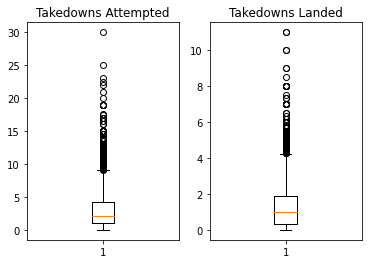

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(takedowns['avg_TD_att'])
plt.title('Takedowns Attempted')

plt.subplot(1,2,2)
plt.boxplot(takedowns['avg_TD_landed'])
plt.title('Takedowns Landed')

In [ ]:
takedowns['winsorize_avg_TD_att'] = winsorize(takedowns['avg_TD_att'], (0, 0.04))
takedowns['winsorize_avg_TD_landed'] = winsorize(takedowns['avg_TD_landed'], (0, 0.03))

Winsorize variables to remove outliers.

Text(0.5, 1.0, 'Takedowns Landed')

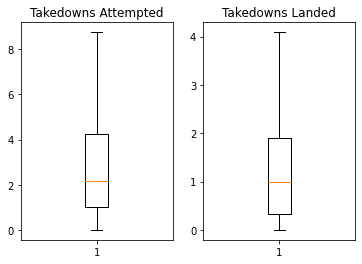

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(takedowns['winsorize_avg_TD_att'])
plt.title('Takedowns Attempted')

plt.subplot(1,2,2)
plt.boxplot(takedowns['winsorize_avg_TD_landed'])
plt.title('Takedowns Landed')

Text(0.5, 0, 'Takedown Attempts')

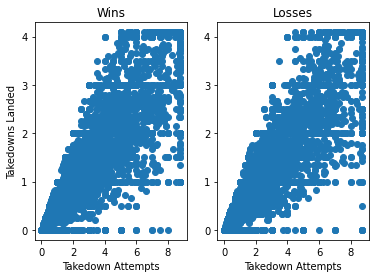

In [ ]:
plt.subplot(1,2,1)
plt.scatter(takedowns[takedowns['is_winner']==1].winsorize_avg_TD_att,
            takedowns[takedowns['is_winner']==1].winsorize_avg_TD_landed)
plt.title('Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')

plt.subplot(1,2,2)
plt.scatter(takedowns[takedowns['is_winner']==0].winsorize_avg_TD_att,
            takedowns[takedowns['is_winner']==0].winsorize_avg_TD_landed)
plt.title('Losses')
plt.xlabel('Takedown Attempts')

The takedown attempts and success of both winning and losing fighters looks somewhat similiar but there is some more density that leans toward the takedowns landed on the Wins graph. 

Takedowns are attempted 18% more often and landed 22% more often by winning fighters so even though the graphs are not dramatically different, it is still important to investigate the takedown mix of winning fighters.

In [ ]:
takedowns.corr()

,avg_TD_att,avg_TD_landed,is_winner,winsorize_avg_TD_att,winsorize_avg_TD_landed
avg_TD_att,1.000000,0.806818,0.058441,0.968308,0.799863
avg_TD_landed,0.806818,1.000000,0.072816,0.813337,0.973957
is_winner,0.058441,0.072816,1.000000,0.057350,0.071219
winsorize_avg_TD_att,0.968308,0.813337,0.057350,1.000000,0.832899
winsorize_avg_TD_landed,0.799863,0.973957,0.071219,0.832899,1.000000


#Logistic Regression

In [ ]:
Y = takedowns['is_winner']
X = takedowns[['winsorize_avg_TD_att', 'winsorize_avg_TD_landed']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

lrm = linear_model.LogisticRegression()
lrm.fit(X_train, Y_train)

preds_lrm = lrm.predict(X_test)
confusion_lrm = confusion_matrix(Y_test, preds_lrm, labels=[1, 0])
print(confusion_lrm)

accuracy_lrm = accuracy_score(Y_test, preds_lrm)
precision_lrm = precision_score(Y_test, preds_lrm)
recall_lrm = recall_score(Y_test, preds_lrm)

print('lrm Accuracy: ', accuracy_lrm)
print('lrm Precision: ', precision_lrm)
print('lrm Recall: ', recall_lrm)

[[458 368]
 [450 373]]
lrm Accuracy:  0.5039417828987265
lrm Precision:  0.5044052863436124
lrm Recall:  0.5544794188861986


A Regression model has a low Adj. R-squared so it does not look to be a good model. Also, the variables are highly correlated at 83% so it does not meet the conditions of Linear Regression.

## KNN

In [ ]:
neighbors= KNeighborsClassifier(n_neighbors=45, weights='distance')
neighbors.fit(X_train,Y_train)

preds_neighbors = neighbors.predict(X_test)
confusion_neighbors = confusion_matrix(Y_test, preds_neighbors, labels=[1, 0])
print(confusion_neighbors)

accuracy_neighbors = accuracy_score(Y_test, preds_neighbors)
precision_neighbors = precision_score(Y_test, preds_neighbors)
recall_neighbors = recall_score(Y_test, preds_neighbors)

print('KNN Accuracy: ', accuracy_neighbors)
print('KNN Precision: ', precision_neighbors)
print('KNN Recall: ', recall_neighbors)

[[477 349]
 [467 356]]
KNN Accuracy:  0.5051546391752577
KNN Precision:  0.5052966101694916
KNN Recall:  0.5774818401937046


#Random Forest

In [ ]:
rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train, Y_train)
preds_rfc = rfc.predict(X_test)
confusion_rfc = confusion_matrix(Y_test, preds_rfc, labels=[1, 0])
print(confusion_rfc)

accuracy_rfc = accuracy_score(Y_test, preds_rfc)
precision_rfc = precision_score(Y_test, preds_rfc)
recall_rfc = recall_score(Y_test, preds_rfc)

print('rfc Accuracy: ', accuracy_rfc)
print('rfc Precision: ', precision_rfc)
print('rfc Recall: ', recall_rfc)

[[406 420]
 [386 437]]
rfc Accuracy:  0.5112189205579138
rfc Precision:  0.5126262626262627
rfc Recall:  0.4915254237288136


#Support Vector

In [ ]:
svm =SVC()
svm.fit(X_train, Y_train)
preds_svm = svm.predict(X_test)
confusion_svm = confusion_matrix(Y_test, preds_svm, labels=[1, 0])
print(confusion_svm)

accuracy_svm = accuracy_score(Y_test, preds_svm)
precision_svm = precision_score(Y_test, preds_svm)
recall_svm = recall_score(Y_test, preds_svm)

print('svm Accuracy: ', accuracy_svm)
print('svm Precision: ', precision_svm)
print('svm Recall: ', recall_svm)

[[482 344]
 [460 363]]
svm Accuracy:  0.5124317768344451
svm Precision:  0.5116772823779193
svm Recall:  0.5835351089588378


# Gradient Boosting

In [ ]:
gbm = ensemble.GradientBoostingClassifier(n_estimators=34, loss='exponential')
gbm.fit(X_train, Y_train)
preds_gbm = gbm.predict(X_test)
confusion_gbm = confusion_matrix(Y_test, preds_gbm, labels=[1, 0])
print(confusion_gbm)

accuracy_gbm = accuracy_score(Y_test, preds_gbm)
precision_gbm = precision_score(Y_test, preds_gbm)
recall_gbm = recall_score(Y_test, preds_gbm)

print('gbm Accuracy: ', accuracy_gbm)
print('gbm Precision: ', precision_gbm)
print('gbm Recall: ', recall_gbm)

[[467 359]
 [444 379]]
gbm Accuracy:  0.5130382049727107
gbm Precision:  0.5126234906695939
gbm Recall:  0.5653753026634383


# Model Comparision

In [ ]:
print('lrm Accuracy: ', accuracy_lrm)
print('lrm Precision: ', precision_lrm)
print('lrm Recall: ', recall_lrm)
print(' ')
print('KNN Accuracy: ', accuracy_neighbors)
print('KNN Precision: ', precision_neighbors)
print('KNN Recall: ', recall_neighbors)
print(' ')
print('rfc Accuracy: ', accuracy_rfc)
print('rfc Precision: ', precision_rfc)
print('rfc Recall: ', recall_rfc)
print(' ')
print('svm Accuracy: ', accuracy_svm)
print('svm Precision: ', precision_svm)
print('svm Recall: ', recall_svm)
print(' ')
print('gbm Accuracy: ', accuracy_gbm)
print('gbm Precision: ', precision_gbm)
print('gbm Recall: ', recall_gbm)

lrm Accuracy:  0.5039417828987265
lrm Precision:  0.5044052863436124
lrm Recall:  0.5544794188861986
 
KNN Accuracy:  0.5100060642813826
KNN Precision:  0.5108225108225108
KNN Recall:  0.43013365735115433
 
rfc Accuracy:  0.5112189205579138
rfc Precision:  0.5126262626262627
rfc Recall:  0.4915254237288136
 
svm Accuracy:  0.5124317768344451
svm Precision:  0.5116772823779193
svm Recall:  0.5835351089588378
 
gbm Accuracy:  0.5130382049727107
gbm Precision:  0.5126234906695939
gbm Recall:  0.5653753026634383


# Next Steps

In [ ]:
ufc_wins.columns.unique()

Index(['Fighter', 'Win_Lose', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'no_of_rounds', 'current_lose_streak',
       'current_streak', 'draw', 'avg_BODY_att', 'avg_BODY_landed',
       'avg_CLINCH_att', 'avg_CLINCH_landed', 'avg_DISTANCE_att',
       'avg_DISTANCE_landed', 'avg_GROUND_att', 'avg_GROUND_landed',
       'avg_HEAD_att', 'avg_HEAD_landed', 'avg_KD', 'avg_LEG_att',
       'avg_LEG_landed', 'avg_PASS', 'avg_REV', 'avg_SIG_STR__att',
       'avg_SIG_STR__landed', 'avg_SIG_STR__pct', 'avg_SUB_ATT', 'avg_TD_att',
       'avg_TD_landed', 'avg_TD_pct', 'avg_TOTAL_STR__att',
       'avg_TOTAL_STR__landed', 'longest_streak', 'losses', 'avg_opp_BODY_att',
       'avg_opp_BODY_landed', 'avg_opp_CLINCH_att', 'avg_opp_CLINCH_landed',
       'avg_opp_DISTANCE_att', 'avg_opp_DISTANCE_landed', 'avg_opp_GROUND_att',
       'avg_opp_GROUND_landed', 'avg_opp_HEAD_att', 'avg_opp_HEAD_landed',
       'avg_opp_KD', 'avg_opp_LEG_att', 'avg_opp_LEG_landed', 'a

In [ ]:
ufc_wins['winsorize_avg_TD_landed'] = winsorize(ufc_wins['avg_TD_landed'], (0, 0.04))
ufc_wins['winsorize_avg_TD_att'] = winsorize(ufc_wins['avg_TD_att'], (0, 0.03))

([<matplotlib.axis.XTick at 0x7fb035142b38>,
 <a list of 5 Text major ticklabel objects>)

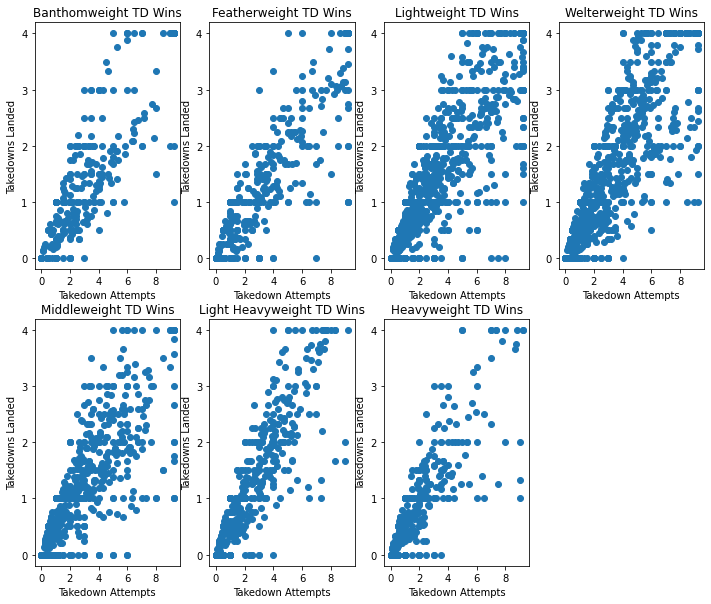

In [ ]:
plt.figure(figsize= (12,10))

plt.subplot(2,4,1)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Bantamweight')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Bantamweight')].winsorize_avg_TD_landed)
plt.title('Banthomweight TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))

plt.subplot(2,4,2)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Featherweight')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Featherweight')].winsorize_avg_TD_landed)
plt.title('Featherweight TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))

plt.subplot(2,4,3)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Lightweight')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Lightweight')].winsorize_avg_TD_landed)
plt.title('Lightweight TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))

plt.subplot(2,4,4)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Welterweight')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Welterweight')].winsorize_avg_TD_landed)
plt.title('Welterweight TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))

plt.subplot(2,4,5)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Middleweight')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Middleweight')].winsorize_avg_TD_landed)
plt.title('Middleweight TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))

plt.subplot(2,4,6)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Light Heavyweight')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Light Heavyweight')].winsorize_avg_TD_landed)
plt.title('Light Heavyweight TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))

plt.subplot(2,4,7)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Heavyweight')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.weight_class == 'Heavyweight')].winsorize_avg_TD_landed)
plt.title('Heavyweight TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))

([<matplotlib.axis.XTick at 0x7fb034817ef0>,
 <a list of 5 Text major ticklabel objects>)

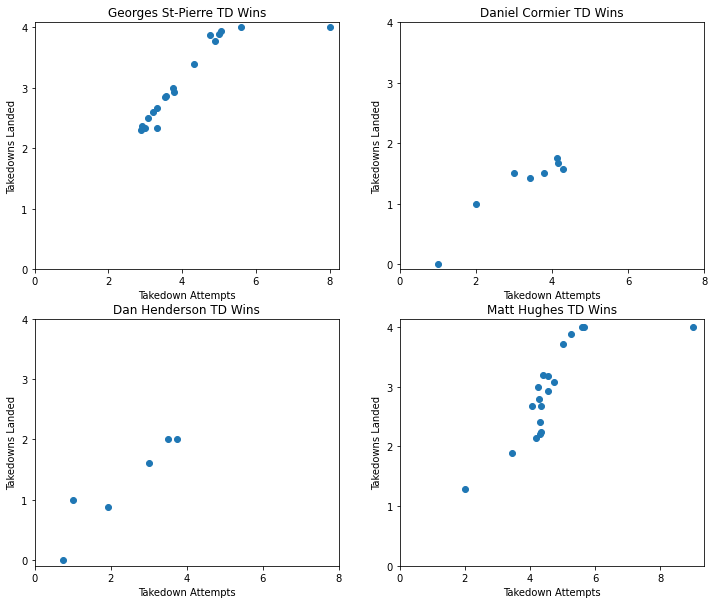

In [ ]:
plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.Fighter == 'Georges St-Pierre')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.Fighter == 'Georges St-Pierre')].winsorize_avg_TD_landed)
plt.title('Georges St-Pierre TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))

plt.subplot(2,2,2)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.Fighter == 'Daniel Cormier')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.Fighter == 'Daniel Cormier')].winsorize_avg_TD_landed)
plt.title('Daniel Cormier TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))

plt.subplot(2,2,3)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.Fighter == 'Dan Henderson')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.Fighter == 'Dan Henderson')].winsorize_avg_TD_landed)
plt.title('Dan Henderson TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))

plt.subplot(2,2,4)
plt.scatter(ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.Fighter == 'Matt Hughes')].winsorize_avg_TD_att,
            ufc_wins[(ufc_wins.is_winner == 1) & (ufc_wins.Fighter == 'Matt Hughes')].winsorize_avg_TD_landed)
plt.title('Matt Hughes TD Wins')
plt.xlabel('Takedown Attempts')
plt.ylabel('Takedowns Landed')
plt.yticks(range(0,5,1))
plt.xticks(range(0,10,2))